In [6]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from maad import sound, features, rois
from maad.util import power2dB, plot2d
from skimage import transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

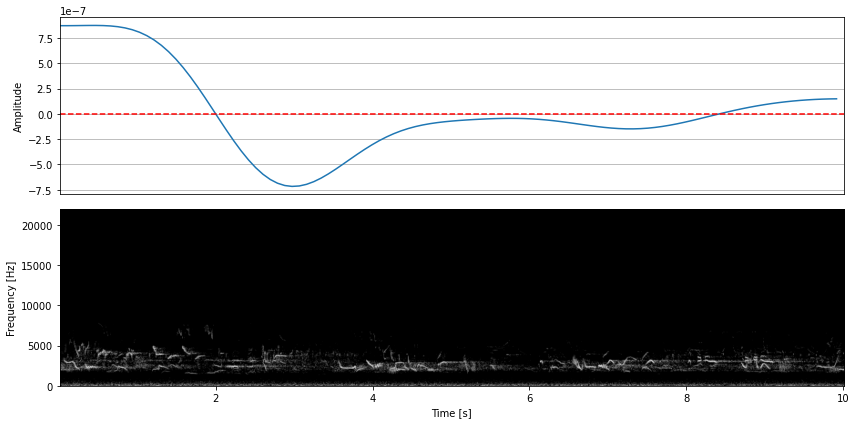

,min_f,min_t,max_f,max_t
0,4500.0,0.00000,8000.0,2.04336
1,4500.0,8.45206,8000.0,10.02460


In [7]:
s, fs = sound.load('audio/lisamono_all.wav')
rois.find_rois_cwt(s, fs, flims=(4500,8000), tlen=2, th=0, display=True)

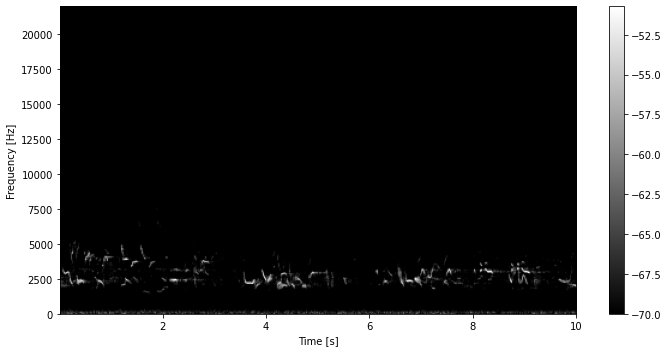

(<AxesSubplot:xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 720x360 with 2 Axes>)

In [9]:
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512)

Sxx_db = power2dB(Sxx, db_range=70)
Sxx_db = transform.rescale(Sxx_db, 0.5, anti_aliasing=True, multichannel=False)  # rescale for faster computation
plot2d(Sxx_db, figsize=(4,10), extent=ext)

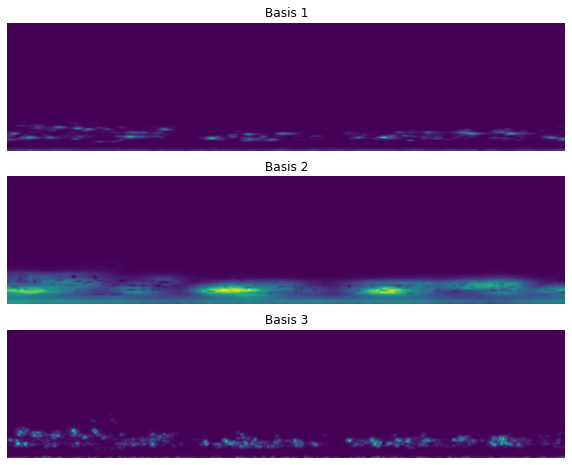

In [10]:
shape_im, params = features.shape_features_raw(Sxx_db, resolution='low')

# Format the output as an array for decomposition
X = np.array(shape_im).reshape([len(shape_im), Sxx_db.size]).transpose()

# Decompose signal using non-negative matrix factorization
Y = NMF(n_components=3, init='random', random_state=0).fit_transform(X)

Y = MinMaxScaler(feature_range=(0,1)).fit_transform(Y)
intensity = 1 - (Sxx_db - Sxx_db.min()) / (Sxx_db.max() - Sxx_db.min())
plt_data = Y.reshape([Sxx_db.shape[0], Sxx_db.shape[1], 3])
plt_data = np.dstack((plt_data, intensity))

fig, axes = plt.subplots(3,1, figsize=(10,8))
for idx, ax in enumerate(axes):
    ax.imshow(plt_data[:,:,idx], origin='lower', aspect='auto',
              interpolation='bilinear')
    ax.set_axis_off()
    ax.set_title('Basis ' + str(idx+1))

Text(0.5, 1.0, 'False-color spectrogram')

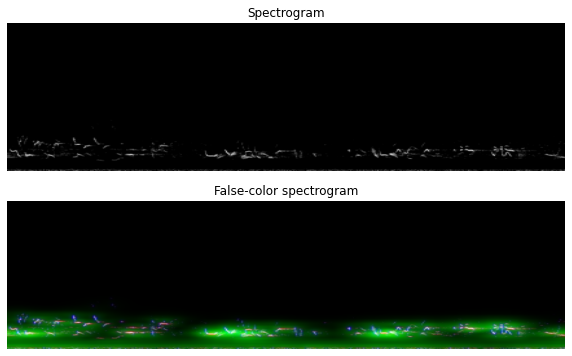

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].imshow(Sxx_db, origin='lower', aspect='auto', interpolation='bilinear', cmap='gray')
ax[0].set_axis_off()
ax[0].set_title('Spectrogram')
ax[1].imshow(plt_data, origin='lower', aspect='auto', interpolation='bilinear')
ax[1].set_axis_off()
ax[1].set_title('False-color spectrogram')